In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Hearts"
model = "nn"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Hearts
0,0,1,0,0,0,0,0,0,2001-01-01 00:00:00.006820,8
1,1,0,0,0,0,0,0,0,2001-01-01 00:00:00.006821,7
2,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006822,J
3,0,0,0,0,0,1,0,0,2001-01-01 00:00:00.006823,Q
4,0,0,1,0,0,0,0,0,2001-02-01 00:00:00.006824,9


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Hearts,id
29119,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035924,Q,1
29120,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035925,10,1
29121,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,1
29122,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035927,A,1
29123,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:09,  3.33s/it]

Rolling:   5%|▌         | 2/40 [00:03<00:54,  1.44s/it]

Rolling:  12%|█▎        | 5/40 [00:03<00:15,  2.29it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:19,  1.69it/s]

Rolling:  20%|██        | 8/40 [00:05<00:16,  1.91it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:14,  2.12it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:12,  2.31it/s]

Rolling:  28%|██▊       | 11/40 [00:06<00:11,  2.45it/s]

Rolling:  30%|███       | 12/40 [00:06<00:09,  2.90it/s]

Rolling:  32%|███▎      | 13/40 [00:07<00:09,  2.81it/s]

Rolling:  35%|███▌      | 14/40 [00:07<00:09,  2.68it/s]

Rolling:  38%|███▊      | 15/40 [00:07<00:07,  3.19it/s]

Rolling:  40%|████      | 16/40 [00:07<00:06,  3.66it/s]

Rolling:  42%|████▎     | 17/40 [00:08<00:08,  2.80it/s]

Rolling:  45%|████▌     | 18/40 [00:08<00:06,  3.25it/s]

Rolling:  48%|████▊     | 19/40 [00:08<00:05,  3.68it/s]

Rolling:  50%|█████     | 20/40 [00:09<00:07,  2.76it/s]

Rolling:  52%|█████▎    | 21/40 [00:09<00:06,  3.13it/s]

Rolling:  55%|█████▌    | 22/40 [00:09<00:05,  3.59it/s]

Rolling:  57%|█████▊    | 23/40 [00:09<00:04,  4.01it/s]

Rolling:  60%|██████    | 24/40 [00:10<00:06,  2.55it/s]

Rolling:  62%|██████▎   | 25/40 [00:10<00:04,  3.05it/s]

Rolling:  65%|██████▌   | 26/40 [00:10<00:04,  3.46it/s]

Rolling:  68%|██████▊   | 27/40 [00:11<00:03,  3.78it/s]

Rolling:  70%|███████   | 28/40 [00:12<00:05,  2.06it/s]

Rolling:  72%|███████▎  | 29/40 [00:12<00:04,  2.51it/s]

Rolling:  75%|███████▌  | 30/40 [00:12<00:03,  2.99it/s]

Rolling:  78%|███████▊  | 31/40 [00:12<00:02,  3.42it/s]

Rolling:  80%|████████  | 32/40 [00:12<00:02,  3.80it/s]

Rolling:  82%|████████▎ | 33/40 [00:13<00:01,  4.04it/s]

Rolling:  85%|████████▌ | 34/40 [00:13<00:02,  2.39it/s]

Rolling:  88%|████████▊ | 35/40 [00:14<00:01,  2.93it/s]

Rolling:  90%|█████████ | 36/40 [00:14<00:01,  3.53it/s]

Rolling:  92%|█████████▎| 37/40 [00:14<00:00,  4.09it/s]

Rolling:  95%|█████████▌| 38/40 [00:14<00:00,  4.61it/s]

Rolling:  98%|█████████▊| 39/40 [00:14<00:00,  5.03it/s]

Rolling: 100%|██████████| 40/40 [00:14<00:00,  5.60it/s]

Rolling: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:05<03:29,  5.36s/it]

Rolling:   5%|▌         | 2/40 [00:06<01:47,  2.83s/it]

Rolling:   8%|▊         | 3/40 [00:08<01:32,  2.51s/it]

Rolling:  10%|█         | 4/40 [00:09<01:02,  1.74s/it]

Rolling:  12%|█▎        | 5/40 [00:11<01:03,  1.82s/it]

Rolling:  15%|█▌        | 6/40 [00:11<00:49,  1.45s/it]

Rolling:  18%|█▊        | 7/40 [00:12<00:39,  1.20s/it]

Rolling:  20%|██        | 8/40 [00:13<00:32,  1.01s/it]

Rolling:  22%|██▎       | 9/40 [00:15<00:41,  1.34s/it]

Rolling:  25%|██▌       | 10/40 [00:15<00:34,  1.16s/it]

Rolling:  28%|██▊       | 11/40 [00:16<00:30,  1.06s/it]

Rolling:  30%|███       | 12/40 [00:17<00:27,  1.03it/s]

Rolling:  32%|███▎      | 13/40 [00:20<00:42,  1.59s/it]

Rolling:  35%|███▌      | 14/40 [00:21<00:34,  1.33s/it]

Rolling:  38%|███▊      | 15/40 [00:21<00:28,  1.12s/it]

Rolling:  40%|████      | 16/40 [00:22<00:23,  1.03it/s]

Rolling:  42%|████▎     | 17/40 [00:23<00:19,  1.17it/s]

Rolling:  45%|████▌     | 18/40 [00:26<00:32,  1.48s/it]

Rolling:  48%|████▊     | 19/40 [00:26<00:26,  1.24s/it]

Rolling:  50%|█████     | 20/40 [00:27<00:21,  1.05s/it]

Rolling:  52%|█████▎    | 21/40 [00:27<00:17,  1.09it/s]

Rolling:  55%|█████▌    | 22/40 [00:28<00:15,  1.20it/s]

Rolling:  57%|█████▊    | 23/40 [00:29<00:13,  1.29it/s]

Rolling:  60%|██████    | 24/40 [00:30<00:12,  1.27it/s]

Rolling:  62%|██████▎   | 25/40 [00:33<00:25,  1.71s/it]

Rolling:  65%|██████▌   | 26/40 [00:34<00:19,  1.37s/it]

Rolling:  68%|██████▊   | 27/40 [00:35<00:14,  1.15s/it]

Rolling:  70%|███████   | 28/40 [00:35<00:11,  1.01it/s]

Rolling:  72%|███████▎  | 29/40 [00:36<00:10,  1.10it/s]

Rolling:  75%|███████▌  | 30/40 [00:37<00:08,  1.16it/s]

Rolling:  78%|███████▊  | 31/40 [00:37<00:07,  1.18it/s]

Rolling:  80%|████████  | 32/40 [00:39<00:07,  1.11it/s]

Rolling:  82%|████████▎ | 33/40 [00:39<00:06,  1.11it/s]

Rolling:  85%|████████▌ | 34/40 [00:43<00:09,  1.65s/it]

Rolling:  88%|████████▊ | 35/40 [00:43<00:06,  1.31s/it]

Rolling:  90%|█████████ | 36/40 [00:44<00:04,  1.06s/it]

Rolling:  92%|█████████▎| 37/40 [00:44<00:02,  1.11it/s]

Rolling:  95%|█████████▌| 38/40 [00:45<00:01,  1.28it/s]

Rolling:  98%|█████████▊| 39/40 [00:45<00:00,  1.44it/s]

Rolling: 100%|██████████| 40/40 [00:46<00:00,  1.60it/s]

Rolling: 100%|██████████| 40/40 [00:46<00:00,  1.16s/it]

,0,1,2,3,4,5,6,7,Date,Hearts,id
33509995,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035924,Q,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035925,10,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035927,A,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Hearts
29124,35944,Q
29125,35945,Q
29126,35946,9
29127,35947,Q
29128,35948,Q


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten (Flatten)           (None, 9600)              0         


 dense (Dense)               (None, 350)               3360350   


 dense_1 (Dense)             (None, 250)               87750     


 dense_2 (Dense)             (None, 150)               37650     


 dense_3 (Dense)             (None, 8)                 1208      


Total params: 3,486,958


Trainable params: 3,486,958


Non-trainable params: 0


_________________________________________________________________


2022-08-12 22:17:40.877609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 2:52 - loss: 2.0762 - accuracy: 0.1406

  6/437 [..............................] - ETA: 4s - loss: 2.1363 - accuracy: 0.1302  

 10/437 [..............................] - ETA: 5s - loss: 2.1283 - accuracy: 0.1219

 15/437 [>.............................] - ETA: 5s - loss: 2.1302 - accuracy: 0.1156

 20/437 [>.............................] - ETA: 5s - loss: 2.1412 - accuracy: 0.1148

 25/437 [>.............................] - ETA: 4s - loss: 2.1403 - accuracy: 0.1156

 29/437 [>.............................] - ETA: 4s - loss: 2.1375 - accuracy: 0.1105

 33/437 [=>............................] - ETA: 4s - loss: 2.1324 - accuracy: 0.1136

 38/437 [=>............................] - ETA: 4s - loss: 2.1284 - accuracy: 0.1131

 42/437 [=>............................] - ETA: 4s - loss: 2.1253 - accuracy: 0.1153

 47/437 [==>...........................] - ETA: 4s - loss: 2.1218 - accuracy: 0.1170

 52/437 [==>...........................] - ETA: 4s - loss: 2.1181 - accuracy: 0.1178

 57/437 [==>...........................] - ETA: 4s - loss: 2.1164 - accuracy: 0.1187

 62/437 [===>..........................] - ETA: 4s - loss: 2.1149 - accuracy: 0.1190

 67/437 [===>..........................] - ETA: 4s - loss: 2.1126 - accuracy: 0.1203

 72/437 [===>..........................] - ETA: 4s - loss: 2.1113 - accuracy: 0.1213

 77/437 [====>.........................] - ETA: 4s - loss: 2.1097 - accuracy: 0.1228

 82/437 [====>.........................] - ETA: 4s - loss: 2.1087 - accuracy: 0.1248

 87/437 [====>.........................] - ETA: 4s - loss: 2.1073 - accuracy: 0.1252

 92/437 [=====>........................] - ETA: 4s - loss: 2.1067 - accuracy: 0.1242

 97/437 [=====>........................] - ETA: 4s - loss: 2.1056 - accuracy: 0.1255

101/437 [=====>........................] - ETA: 4s - loss: 2.1043 - accuracy: 0.1270

105/437 [======>.......................] - ETA: 3s - loss: 2.1041 - accuracy: 0.1274

109/437 [======>.......................] - ETA: 3s - loss: 2.1034 - accuracy: 0.1282

113/437 [======>.......................] - ETA: 3s - loss: 2.1026 - accuracy: 0.1287

117/437 [=======>......................] - ETA: 3s - loss: 2.1022 - accuracy: 0.1286

120/437 [=======>......................] - ETA: 3s - loss: 2.1020 - accuracy: 0.1285

124/437 [=======>......................] - ETA: 3s - loss: 2.1017 - accuracy: 0.1285

128/437 [=======>......................] - ETA: 3s - loss: 2.1014 - accuracy: 0.1287

132/437 [========>.....................] - ETA: 3s - loss: 2.1010 - accuracy: 0.1284

137/437 [========>.....................] - ETA: 3s - loss: 2.1006 - accuracy: 0.1281

141/437 [========>.....................] - ETA: 3s - loss: 2.0999 - accuracy: 0.1280

145/437 [========>.....................] - ETA: 3s - loss: 2.0996 - accuracy: 0.1284

149/437 [=========>....................] - ETA: 3s - loss: 2.0988 - accuracy: 0.1289

153/437 [=========>....................] - ETA: 3s - loss: 2.0986 - accuracy: 0.1282

157/437 [=========>....................] - ETA: 3s - loss: 2.0978 - accuracy: 0.1287

161/437 [==========>...................] - ETA: 3s - loss: 2.0976 - accuracy: 0.1281

165/437 [==========>...................] - ETA: 3s - loss: 2.0972 - accuracy: 0.1282

169/437 [==========>...................] - ETA: 3s - loss: 2.0971 - accuracy: 0.1273

174/437 [==========>...................] - ETA: 3s - loss: 2.0966 - accuracy: 0.1275

179/437 [===========>..................] - ETA: 3s - loss: 2.0964 - accuracy: 0.1274

184/437 [===========>..................] - ETA: 3s - loss: 2.0960 - accuracy: 0.1275

188/437 [===========>..................] - ETA: 3s - loss: 2.0963 - accuracy: 0.1266

193/437 [============>.................] - ETA: 3s - loss: 2.0958 - accuracy: 0.1265

198/437 [============>.................] - ETA: 3s - loss: 2.0956 - accuracy: 0.1267

203/437 [============>.................] - ETA: 2s - loss: 2.0953 - accuracy: 0.1266

208/437 [=============>................] - ETA: 2s - loss: 2.0952 - accuracy: 0.1264

213/437 [=============>................] - ETA: 2s - loss: 2.0948 - accuracy: 0.1270

218/437 [=============>................] - ETA: 2s - loss: 2.0946 - accuracy: 0.1269

223/437 [==============>...............] - ETA: 2s - loss: 2.0943 - accuracy: 0.1270

228/437 [==============>...............] - ETA: 2s - loss: 2.0941 - accuracy: 0.1271

233/437 [==============>...............] - ETA: 2s - loss: 2.0938 - accuracy: 0.1269

238/437 [===============>..............] - ETA: 2s - loss: 2.0935 - accuracy: 0.1268

243/437 [===============>..............] - ETA: 2s - loss: 2.0933 - accuracy: 0.1265

247/437 [===============>..............] - ETA: 2s - loss: 2.0932 - accuracy: 0.1267

252/437 [================>.............] - ETA: 2s - loss: 2.0931 - accuracy: 0.1264

257/437 [================>.............] - ETA: 2s - loss: 2.0928 - accuracy: 0.1263

262/437 [================>.............] - ETA: 2s - loss: 2.0927 - accuracy: 0.1263

267/437 [=================>............] - ETA: 2s - loss: 2.0924 - accuracy: 0.1272

272/437 [=================>............] - ETA: 2s - loss: 2.0922 - accuracy: 0.1270

277/437 [==================>...........] - ETA: 1s - loss: 2.0920 - accuracy: 0.1270

282/437 [==================>...........] - ETA: 1s - loss: 2.0918 - accuracy: 0.1272

287/437 [==================>...........] - ETA: 1s - loss: 2.0916 - accuracy: 0.1277

292/437 [===================>..........] - ETA: 1s - loss: 2.0914 - accuracy: 0.1278

296/437 [===================>..........] - ETA: 1s - loss: 2.0913 - accuracy: 0.1278

301/437 [===================>..........] - ETA: 1s - loss: 2.0911 - accuracy: 0.1282

305/437 [===================>..........] - ETA: 1s - loss: 2.0910 - accuracy: 0.1282

310/437 [====================>.........] - ETA: 1s - loss: 2.0908 - accuracy: 0.1283

315/437 [====================>.........] - ETA: 1s - loss: 2.0906 - accuracy: 0.1280

320/437 [====================>.........] - ETA: 1s - loss: 2.0904 - accuracy: 0.1284

325/437 [=====================>........] - ETA: 1s - loss: 2.0903 - accuracy: 0.1286

330/437 [=====================>........] - ETA: 1s - loss: 2.0903 - accuracy: 0.1282

335/437 [=====================>........] - ETA: 1s - loss: 2.0901 - accuracy: 0.1282

340/437 [======================>.......] - ETA: 1s - loss: 2.0900 - accuracy: 0.1282

345/437 [======================>.......] - ETA: 1s - loss: 2.0899 - accuracy: 0.1280

350/437 [=======================>......] - ETA: 1s - loss: 2.0897 - accuracy: 0.1279

355/437 [=======================>......] - ETA: 1s - loss: 2.0896 - accuracy: 0.1280

360/437 [=======================>......] - ETA: 0s - loss: 2.0895 - accuracy: 0.1282

365/437 [========================>.....] - ETA: 0s - loss: 2.0894 - accuracy: 0.1280

370/437 [========================>.....] - ETA: 0s - loss: 2.0893 - accuracy: 0.1282

375/437 [========================>.....] - ETA: 0s - loss: 2.0892 - accuracy: 0.1281

380/437 [=========================>....] - ETA: 0s - loss: 2.0891 - accuracy: 0.1278

385/437 [=========================>....] - ETA: 0s - loss: 2.0889 - accuracy: 0.1280

390/437 [=========================>....] - ETA: 0s - loss: 2.0888 - accuracy: 0.1275

394/437 [==========================>...] - ETA: 0s - loss: 2.0887 - accuracy: 0.1274

398/437 [==========================>...] - ETA: 0s - loss: 2.0886 - accuracy: 0.1278

402/437 [==========================>...] - ETA: 0s - loss: 2.0885 - accuracy: 0.1278

406/437 [==========================>...] - ETA: 0s - loss: 2.0884 - accuracy: 0.1277

410/437 [===========================>..] - ETA: 0s - loss: 2.0883 - accuracy: 0.1280

414/437 [===========================>..] - ETA: 0s - loss: 2.0883 - accuracy: 0.1279

418/437 [===========================>..] - ETA: 0s - loss: 2.0882 - accuracy: 0.1278

422/437 [===========================>..] - ETA: 0s - loss: 2.0881 - accuracy: 0.1279

427/437 [============================>.] - ETA: 0s - loss: 2.0881 - accuracy: 0.1277

432/437 [============================>.] - ETA: 0s - loss: 2.0880 - accuracy: 0.1276

437/437 [==============================] - ETA: 0s - loss: 2.0879 - accuracy: 0.1277

437/437 [==============================] - 7s 14ms/step - loss: 2.0879 - accuracy: 0.1277 - val_loss: 2.0806 - val_accuracy: 0.1196


Epoch 2/300


  1/437 [..............................] - ETA: 4s - loss: 2.0641 - accuracy: 0.1562

  6/437 [..............................] - ETA: 4s - loss: 2.0778 - accuracy: 0.1354

 11/437 [..............................] - ETA: 4s - loss: 2.0778 - accuracy: 0.1222

 16/437 [>.............................] - ETA: 4s - loss: 2.0775 - accuracy: 0.1250

 21/437 [>.............................] - ETA: 4s - loss: 2.0763 - accuracy: 0.1354

 26/437 [>.............................] - ETA: 4s - loss: 2.0755 - accuracy: 0.1388

 31/437 [=>............................] - ETA: 4s - loss: 2.0761 - accuracy: 0.1386

 36/437 [=>............................] - ETA: 4s - loss: 2.0757 - accuracy: 0.1385

 41/437 [=>............................] - ETA: 4s - loss: 2.0762 - accuracy: 0.1380

 46/437 [==>...........................] - ETA: 4s - loss: 2.0753 - accuracy: 0.1389

 51/437 [==>...........................] - ETA: 4s - loss: 2.0745 - accuracy: 0.1409

 56/437 [==>...........................] - ETA: 4s - loss: 2.0750 - accuracy: 0.1384

 61/437 [===>..........................] - ETA: 4s - loss: 2.0760 - accuracy: 0.1355

 66/437 [===>..........................] - ETA: 4s - loss: 2.0755 - accuracy: 0.1371

 71/437 [===>..........................] - ETA: 4s - loss: 2.0768 - accuracy: 0.1336

 76/437 [====>.........................] - ETA: 4s - loss: 2.0763 - accuracy: 0.1361

 81/437 [====>.........................] - ETA: 4s - loss: 2.0768 - accuracy: 0.1362

 85/437 [====>.........................] - ETA: 4s - loss: 2.0773 - accuracy: 0.1364

 89/437 [=====>........................] - ETA: 4s - loss: 2.0772 - accuracy: 0.1369

 93/437 [=====>........................] - ETA: 4s - loss: 2.0769 - accuracy: 0.1368

 96/437 [=====>........................] - ETA: 4s - loss: 2.0774 - accuracy: 0.1370

101/437 [=====>........................] - ETA: 4s - loss: 2.0774 - accuracy: 0.1369

106/437 [======>.......................] - ETA: 4s - loss: 2.0781 - accuracy: 0.1366

111/437 [======>.......................] - ETA: 3s - loss: 2.0780 - accuracy: 0.1368

116/437 [======>.......................] - ETA: 3s - loss: 2.0782 - accuracy: 0.1363

120/437 [=======>......................] - ETA: 3s - loss: 2.0783 - accuracy: 0.1358

125/437 [=======>......................] - ETA: 3s - loss: 2.0781 - accuracy: 0.1355

129/437 [=======>......................] - ETA: 3s - loss: 2.0778 - accuracy: 0.1369

134/437 [========>.....................] - ETA: 3s - loss: 2.0778 - accuracy: 0.1372

138/437 [========>.....................] - ETA: 3s - loss: 2.0776 - accuracy: 0.1378

142/437 [========>.....................] - ETA: 3s - loss: 2.0771 - accuracy: 0.1382

146/437 [=========>....................] - ETA: 3s - loss: 2.0772 - accuracy: 0.1394

151/437 [=========>....................] - ETA: 3s - loss: 2.0767 - accuracy: 0.1405

156/437 [=========>....................] - ETA: 3s - loss: 2.0780 - accuracy: 0.1394

161/437 [==========>...................] - ETA: 3s - loss: 2.0777 - accuracy: 0.1399

165/437 [==========>...................] - ETA: 3s - loss: 2.0781 - accuracy: 0.1396

169/437 [==========>...................] - ETA: 3s - loss: 2.0780 - accuracy: 0.1403

173/437 [==========>...................] - ETA: 3s - loss: 2.0781 - accuracy: 0.1402

178/437 [===========>..................] - ETA: 3s - loss: 2.0778 - accuracy: 0.1399

183/437 [===========>..................] - ETA: 3s - loss: 2.0778 - accuracy: 0.1399

187/437 [===========>..................] - ETA: 3s - loss: 2.0779 - accuracy: 0.1402

191/437 [============>.................] - ETA: 3s - loss: 2.0781 - accuracy: 0.1398

194/437 [============>.................] - ETA: 3s - loss: 2.0778 - accuracy: 0.1397

199/437 [============>.................] - ETA: 2s - loss: 2.0776 - accuracy: 0.1394

204/437 [=============>................] - ETA: 2s - loss: 2.0772 - accuracy: 0.1397

209/437 [=============>................] - ETA: 2s - loss: 2.0772 - accuracy: 0.1400

214/437 [=============>................] - ETA: 2s - loss: 2.0772 - accuracy: 0.1403

219/437 [==============>...............] - ETA: 2s - loss: 2.0773 - accuracy: 0.1411

223/437 [==============>...............] - ETA: 2s - loss: 2.0772 - accuracy: 0.1409

227/437 [==============>...............] - ETA: 2s - loss: 2.0772 - accuracy: 0.1407

231/437 [==============>...............] - ETA: 2s - loss: 2.0772 - accuracy: 0.1414

235/437 [===============>..............] - ETA: 2s - loss: 2.0774 - accuracy: 0.1413

239/437 [===============>..............] - ETA: 2s - loss: 2.0774 - accuracy: 0.1414

242/437 [===============>..............] - ETA: 2s - loss: 2.0775 - accuracy: 0.1411

246/437 [===============>..............] - ETA: 2s - loss: 2.0773 - accuracy: 0.1414

250/437 [================>.............] - ETA: 2s - loss: 2.0771 - accuracy: 0.1414

254/437 [================>.............] - ETA: 2s - loss: 2.0772 - accuracy: 0.1413

259/437 [================>.............] - ETA: 2s - loss: 2.0773 - accuracy: 0.1413

264/437 [=================>............] - ETA: 2s - loss: 2.0768 - accuracy: 0.1423

269/437 [=================>............] - ETA: 2s - loss: 2.0773 - accuracy: 0.1420

274/437 [=================>............] - ETA: 2s - loss: 2.0771 - accuracy: 0.1419

279/437 [==================>...........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1421

284/437 [==================>...........] - ETA: 1s - loss: 2.0770 - accuracy: 0.1432

289/437 [==================>...........] - ETA: 1s - loss: 2.0769 - accuracy: 0.1432

293/437 [===================>..........] - ETA: 1s - loss: 2.0769 - accuracy: 0.1432

297/437 [===================>..........] - ETA: 1s - loss: 2.0770 - accuracy: 0.1429

301/437 [===================>..........] - ETA: 1s - loss: 2.0772 - accuracy: 0.1429

304/437 [===================>..........] - ETA: 1s - loss: 2.0772 - accuracy: 0.1428

307/437 [====================>.........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1427

310/437 [====================>.........] - ETA: 1s - loss: 2.0770 - accuracy: 0.1429

314/437 [====================>.........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1429

317/437 [====================>.........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1425

321/437 [=====================>........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1423

326/437 [=====================>........] - ETA: 1s - loss: 2.0771 - accuracy: 0.1423

331/437 [=====================>........] - ETA: 1s - loss: 2.0768 - accuracy: 0.1430

335/437 [=====================>........] - ETA: 1s - loss: 2.0768 - accuracy: 0.1430

340/437 [======================>.......] - ETA: 1s - loss: 2.0769 - accuracy: 0.1430

345/437 [======================>.......] - ETA: 1s - loss: 2.0769 - accuracy: 0.1433

350/437 [=======================>......] - ETA: 1s - loss: 2.0768 - accuracy: 0.1433

355/437 [=======================>......] - ETA: 1s - loss: 2.0768 - accuracy: 0.1434

359/437 [=======================>......] - ETA: 0s - loss: 2.0767 - accuracy: 0.1431

363/437 [=======================>......] - ETA: 0s - loss: 2.0766 - accuracy: 0.1435

367/437 [========================>.....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1436

371/437 [========================>.....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1435

375/437 [========================>.....] - ETA: 0s - loss: 2.0765 - accuracy: 0.1437

379/437 [=========================>....] - ETA: 0s - loss: 2.0764 - accuracy: 0.1440

383/437 [=========================>....] - ETA: 0s - loss: 2.0764 - accuracy: 0.1441

388/437 [=========================>....] - ETA: 0s - loss: 2.0763 - accuracy: 0.1446

393/437 [=========================>....] - ETA: 0s - loss: 2.0763 - accuracy: 0.1448

398/437 [==========================>...] - ETA: 0s - loss: 2.0762 - accuracy: 0.1449

403/437 [==========================>...] - ETA: 0s - loss: 2.0761 - accuracy: 0.1450

408/437 [===========================>..] - ETA: 0s - loss: 2.0762 - accuracy: 0.1451

413/437 [===========================>..] - ETA: 0s - loss: 2.0761 - accuracy: 0.1455

417/437 [===========================>..] - ETA: 0s - loss: 2.0759 - accuracy: 0.1456

421/437 [===========================>..] - ETA: 0s - loss: 2.0759 - accuracy: 0.1459

424/437 [============================>.] - ETA: 0s - loss: 2.0759 - accuracy: 0.1458

427/437 [============================>.] - ETA: 0s - loss: 2.0759 - accuracy: 0.1459

430/437 [============================>.] - ETA: 0s - loss: 2.0758 - accuracy: 0.1460

433/437 [============================>.] - ETA: 0s - loss: 2.0757 - accuracy: 0.1461

437/437 [==============================] - ETA: 0s - loss: 2.0758 - accuracy: 0.1462

437/437 [==============================] - 6s 15ms/step - loss: 2.0758 - accuracy: 0.1462 - val_loss: 2.0892 - val_accuracy: 0.1266


Epoch 3/300


  1/437 [..............................] - ETA: 6s - loss: 2.0024 - accuracy: 0.2188

  5/437 [..............................] - ETA: 5s - loss: 1.9848 - accuracy: 0.2719

 10/437 [..............................] - ETA: 5s - loss: 1.9839 - accuracy: 0.2672

 15/437 [>.............................] - ETA: 5s - loss: 1.9729 - accuracy: 0.2510

 20/437 [>.............................] - ETA: 5s - loss: 1.9745 - accuracy: 0.2430

 25/437 [>.............................] - ETA: 5s - loss: 1.9637 - accuracy: 0.2469

 30/437 [=>............................] - ETA: 4s - loss: 1.9653 - accuracy: 0.2474

 35/437 [=>............................] - ETA: 4s - loss: 1.9696 - accuracy: 0.2487

 40/437 [=>............................] - ETA: 4s - loss: 1.9642 - accuracy: 0.2512

 45/437 [==>...........................] - ETA: 4s - loss: 1.9627 - accuracy: 0.2493

 50/437 [==>...........................] - ETA: 4s - loss: 1.9662 - accuracy: 0.2491

 55/437 [==>...........................] - ETA: 4s - loss: 1.9637 - accuracy: 0.2472

 60/437 [===>..........................] - ETA: 4s - loss: 1.9643 - accuracy: 0.2469

 65/437 [===>..........................] - ETA: 4s - loss: 1.9638 - accuracy: 0.2445

 70/437 [===>..........................] - ETA: 4s - loss: 1.9673 - accuracy: 0.2429

 75/437 [====>.........................] - ETA: 4s - loss: 1.9685 - accuracy: 0.2412

 80/437 [====>.........................] - ETA: 4s - loss: 1.9702 - accuracy: 0.2404

 85/437 [====>.........................] - ETA: 4s - loss: 1.9721 - accuracy: 0.2403

 89/437 [=====>........................] - ETA: 4s - loss: 1.9705 - accuracy: 0.2405

 94/437 [=====>........................] - ETA: 4s - loss: 1.9699 - accuracy: 0.2414

 99/437 [=====>........................] - ETA: 4s - loss: 1.9714 - accuracy: 0.2418

104/437 [======>.......................] - ETA: 3s - loss: 1.9711 - accuracy: 0.2401

109/437 [======>.......................] - ETA: 3s - loss: 1.9722 - accuracy: 0.2403

114/437 [======>.......................] - ETA: 3s - loss: 1.9721 - accuracy: 0.2397

118/437 [=======>......................] - ETA: 3s - loss: 1.9719 - accuracy: 0.2403

123/437 [=======>......................] - ETA: 3s - loss: 1.9721 - accuracy: 0.2406

128/437 [=======>......................] - ETA: 3s - loss: 1.9728 - accuracy: 0.2400

133/437 [========>.....................] - ETA: 3s - loss: 1.9735 - accuracy: 0.2388

137/437 [========>.....................] - ETA: 3s - loss: 1.9741 - accuracy: 0.2384

140/437 [========>.....................] - ETA: 3s - loss: 1.9738 - accuracy: 0.2387

143/437 [========>.....................] - ETA: 3s - loss: 1.9744 - accuracy: 0.2377

146/437 [=========>....................] - ETA: 3s - loss: 1.9736 - accuracy: 0.2376

149/437 [=========>....................] - ETA: 3s - loss: 1.9740 - accuracy: 0.2367

153/437 [=========>....................] - ETA: 3s - loss: 1.9753 - accuracy: 0.2366

157/437 [=========>....................] - ETA: 3s - loss: 1.9745 - accuracy: 0.2374

161/437 [==========>...................] - ETA: 3s - loss: 1.9733 - accuracy: 0.2385

165/437 [==========>...................] - ETA: 3s - loss: 1.9733 - accuracy: 0.2390

169/437 [==========>...................] - ETA: 3s - loss: 1.9725 - accuracy: 0.2399

173/437 [==========>...................] - ETA: 3s - loss: 1.9736 - accuracy: 0.2396

177/437 [===========>..................] - ETA: 3s - loss: 1.9738 - accuracy: 0.2396

181/437 [===========>..................] - ETA: 3s - loss: 1.9742 - accuracy: 0.2400

185/437 [===========>..................] - ETA: 3s - loss: 1.9739 - accuracy: 0.2396

189/437 [===========>..................] - ETA: 3s - loss: 1.9738 - accuracy: 0.2388

193/437 [============>.................] - ETA: 3s - loss: 1.9746 - accuracy: 0.2383

197/437 [============>.................] - ETA: 3s - loss: 1.9748 - accuracy: 0.2376

201/437 [============>.................] - ETA: 3s - loss: 1.9751 - accuracy: 0.2372

205/437 [=============>................] - ETA: 3s - loss: 1.9737 - accuracy: 0.2381

209/437 [=============>................] - ETA: 3s - loss: 1.9749 - accuracy: 0.2366

213/437 [=============>................] - ETA: 2s - loss: 1.9748 - accuracy: 0.2355

217/437 [=============>................] - ETA: 2s - loss: 1.9746 - accuracy: 0.2362

221/437 [==============>...............] - ETA: 2s - loss: 1.9755 - accuracy: 0.2356

225/437 [==============>...............] - ETA: 2s - loss: 1.9762 - accuracy: 0.2352

229/437 [==============>...............] - ETA: 2s - loss: 1.9768 - accuracy: 0.2342

234/437 [===============>..............] - ETA: 2s - loss: 1.9763 - accuracy: 0.2343

239/437 [===============>..............] - ETA: 2s - loss: 1.9766 - accuracy: 0.2344

244/437 [===============>..............] - ETA: 2s - loss: 1.9763 - accuracy: 0.2346

249/437 [================>.............] - ETA: 2s - loss: 1.9756 - accuracy: 0.2351

254/437 [================>.............] - ETA: 2s - loss: 1.9760 - accuracy: 0.2349

259/437 [================>.............] - ETA: 2s - loss: 1.9765 - accuracy: 0.2345

263/437 [=================>............] - ETA: 2s - loss: 1.9767 - accuracy: 0.2345

267/437 [=================>............] - ETA: 2s - loss: 1.9775 - accuracy: 0.2337

272/437 [=================>............] - ETA: 2s - loss: 1.9771 - accuracy: 0.2341

276/437 [=================>............] - ETA: 2s - loss: 1.9777 - accuracy: 0.2338

281/437 [==================>...........] - ETA: 2s - loss: 1.9785 - accuracy: 0.2333

286/437 [==================>...........] - ETA: 1s - loss: 1.9792 - accuracy: 0.2319

291/437 [==================>...........] - ETA: 1s - loss: 1.9798 - accuracy: 0.2315

296/437 [===================>..........] - ETA: 1s - loss: 1.9802 - accuracy: 0.2308

301/437 [===================>..........] - ETA: 1s - loss: 1.9798 - accuracy: 0.2311

305/437 [===================>..........] - ETA: 1s - loss: 1.9798 - accuracy: 0.2315

309/437 [====================>.........] - ETA: 1s - loss: 1.9806 - accuracy: 0.2309

313/437 [====================>.........] - ETA: 1s - loss: 1.9806 - accuracy: 0.2308

318/437 [====================>.........] - ETA: 1s - loss: 1.9812 - accuracy: 0.2306

323/437 [=====================>........] - ETA: 1s - loss: 1.9813 - accuracy: 0.2310

328/437 [=====================>........] - ETA: 1s - loss: 1.9813 - accuracy: 0.2306

332/437 [=====================>........] - ETA: 1s - loss: 1.9815 - accuracy: 0.2302

337/437 [======================>.......] - ETA: 1s - loss: 1.9819 - accuracy: 0.2297

342/437 [======================>.......] - ETA: 1s - loss: 1.9827 - accuracy: 0.2291

347/437 [======================>.......] - ETA: 1s - loss: 1.9829 - accuracy: 0.2292

352/437 [=======================>......] - ETA: 1s - loss: 1.9831 - accuracy: 0.2291

357/437 [=======================>......] - ETA: 1s - loss: 1.9831 - accuracy: 0.2294

361/437 [=======================>......] - ETA: 0s - loss: 1.9834 - accuracy: 0.2290

366/437 [========================>.....] - ETA: 0s - loss: 1.9829 - accuracy: 0.2291

371/437 [========================>.....] - ETA: 0s - loss: 1.9830 - accuracy: 0.2287

375/437 [========================>.....] - ETA: 0s - loss: 1.9830 - accuracy: 0.2287

380/437 [=========================>....] - ETA: 0s - loss: 1.9832 - accuracy: 0.2282

385/437 [=========================>....] - ETA: 0s - loss: 1.9835 - accuracy: 0.2280

390/437 [=========================>....] - ETA: 0s - loss: 1.9841 - accuracy: 0.2273

394/437 [==========================>...] - ETA: 0s - loss: 1.9842 - accuracy: 0.2275

398/437 [==========================>...] - ETA: 0s - loss: 1.9847 - accuracy: 0.2273

401/437 [==========================>...] - ETA: 0s - loss: 1.9848 - accuracy: 0.2270

405/437 [==========================>...] - ETA: 0s - loss: 1.9848 - accuracy: 0.2269

409/437 [===========================>..] - ETA: 0s - loss: 1.9845 - accuracy: 0.2270

413/437 [===========================>..] - ETA: 0s - loss: 1.9844 - accuracy: 0.2273

417/437 [===========================>..] - ETA: 0s - loss: 1.9842 - accuracy: 0.2278

421/437 [===========================>..] - ETA: 0s - loss: 1.9841 - accuracy: 0.2280

425/437 [============================>.] - ETA: 0s - loss: 1.9841 - accuracy: 0.2281

429/437 [============================>.] - ETA: 0s - loss: 1.9843 - accuracy: 0.2280

433/437 [============================>.] - ETA: 0s - loss: 1.9846 - accuracy: 0.2279

437/437 [==============================] - 6s 14ms/step - loss: 1.9850 - accuracy: 0.2277 - val_loss: 2.1530 - val_accuracy: 0.1219


Epoch 4/300


  1/437 [..............................] - ETA: 5s - loss: 1.7075 - accuracy: 0.4688

  6/437 [..............................] - ETA: 4s - loss: 1.6507 - accuracy: 0.4193

 11/437 [..............................] - ETA: 4s - loss: 1.5903 - accuracy: 0.4616

 16/437 [>.............................] - ETA: 4s - loss: 1.5538 - accuracy: 0.4658

 20/437 [>.............................] - ETA: 4s - loss: 1.5531 - accuracy: 0.4672

 25/437 [>.............................] - ETA: 4s - loss: 1.5409 - accuracy: 0.4694

 30/437 [=>............................] - ETA: 4s - loss: 1.5269 - accuracy: 0.4740

 35/437 [=>............................] - ETA: 4s - loss: 1.5163 - accuracy: 0.4714

 40/437 [=>............................] - ETA: 4s - loss: 1.5219 - accuracy: 0.4691

 45/437 [==>...........................] - ETA: 4s - loss: 1.5166 - accuracy: 0.4670

 50/437 [==>...........................] - ETA: 4s - loss: 1.5202 - accuracy: 0.4647

 54/437 [==>...........................] - ETA: 4s - loss: 1.5229 - accuracy: 0.4653

 59/437 [===>..........................] - ETA: 4s - loss: 1.5194 - accuracy: 0.4650

 64/437 [===>..........................] - ETA: 4s - loss: 1.5178 - accuracy: 0.4639

 68/437 [===>..........................] - ETA: 4s - loss: 1.5220 - accuracy: 0.4602

 72/437 [===>..........................] - ETA: 4s - loss: 1.5263 - accuracy: 0.4568

 76/437 [====>.........................] - ETA: 4s - loss: 1.5295 - accuracy: 0.4546

 80/437 [====>.........................] - ETA: 4s - loss: 1.5290 - accuracy: 0.4531

 84/437 [====>.........................] - ETA: 4s - loss: 1.5346 - accuracy: 0.4505

 89/437 [=====>........................] - ETA: 4s - loss: 1.5376 - accuracy: 0.4500

 94/437 [=====>........................] - ETA: 4s - loss: 1.5377 - accuracy: 0.4490

 99/437 [=====>........................] - ETA: 4s - loss: 1.5393 - accuracy: 0.4478

103/437 [======>.......................] - ETA: 3s - loss: 1.5413 - accuracy: 0.4469

108/437 [======>.......................] - ETA: 3s - loss: 1.5373 - accuracy: 0.4481

112/437 [======>.......................] - ETA: 3s - loss: 1.5404 - accuracy: 0.4466

117/437 [=======>......................] - ETA: 3s - loss: 1.5420 - accuracy: 0.4455

121/437 [=======>......................] - ETA: 3s - loss: 1.5420 - accuracy: 0.4458

126/437 [=======>......................] - ETA: 3s - loss: 1.5465 - accuracy: 0.4441

131/437 [=======>......................] - ETA: 3s - loss: 1.5497 - accuracy: 0.4436

136/437 [========>.....................] - ETA: 3s - loss: 1.5494 - accuracy: 0.4438

139/437 [========>.....................] - ETA: 3s - loss: 1.5492 - accuracy: 0.4439

144/437 [========>.....................] - ETA: 3s - loss: 1.5521 - accuracy: 0.4423

149/437 [=========>....................] - ETA: 3s - loss: 1.5510 - accuracy: 0.4430

154/437 [=========>....................] - ETA: 3s - loss: 1.5514 - accuracy: 0.4423

159/437 [=========>....................] - ETA: 3s - loss: 1.5520 - accuracy: 0.4410

164/437 [==========>...................] - ETA: 3s - loss: 1.5549 - accuracy: 0.4401

169/437 [==========>...................] - ETA: 3s - loss: 1.5573 - accuracy: 0.4384

174/437 [==========>...................] - ETA: 3s - loss: 1.5569 - accuracy: 0.4383

179/437 [===========>..................] - ETA: 3s - loss: 1.5589 - accuracy: 0.4378

184/437 [===========>..................] - ETA: 2s - loss: 1.5624 - accuracy: 0.4376

189/437 [===========>..................] - ETA: 2s - loss: 1.5645 - accuracy: 0.4366

194/437 [============>.................] - ETA: 2s - loss: 1.5669 - accuracy: 0.4354

199/437 [============>.................] - ETA: 2s - loss: 1.5697 - accuracy: 0.4341

204/437 [=============>................] - ETA: 2s - loss: 1.5716 - accuracy: 0.4325

209/437 [=============>................] - ETA: 2s - loss: 1.5742 - accuracy: 0.4318

214/437 [=============>................] - ETA: 2s - loss: 1.5764 - accuracy: 0.4309

219/437 [==============>...............] - ETA: 2s - loss: 1.5793 - accuracy: 0.4297

224/437 [==============>...............] - ETA: 2s - loss: 1.5815 - accuracy: 0.4290

228/437 [==============>...............] - ETA: 2s - loss: 1.5831 - accuracy: 0.4280

233/437 [==============>...............] - ETA: 2s - loss: 1.5842 - accuracy: 0.4274

238/437 [===============>..............] - ETA: 2s - loss: 1.5835 - accuracy: 0.4285

243/437 [===============>..............] - ETA: 2s - loss: 1.5850 - accuracy: 0.4284

248/437 [================>.............] - ETA: 2s - loss: 1.5865 - accuracy: 0.4274

253/437 [================>.............] - ETA: 2s - loss: 1.5881 - accuracy: 0.4264

258/437 [================>.............] - ETA: 2s - loss: 1.5892 - accuracy: 0.4262

263/437 [=================>............] - ETA: 2s - loss: 1.5908 - accuracy: 0.4254

268/437 [=================>............] - ETA: 1s - loss: 1.5909 - accuracy: 0.4250

273/437 [=================>............] - ETA: 1s - loss: 1.5926 - accuracy: 0.4239

278/437 [==================>...........] - ETA: 1s - loss: 1.5931 - accuracy: 0.4238

283/437 [==================>...........] - ETA: 1s - loss: 1.5950 - accuracy: 0.4228

287/437 [==================>...........] - ETA: 1s - loss: 1.5960 - accuracy: 0.4224

292/437 [===================>..........] - ETA: 1s - loss: 1.5974 - accuracy: 0.4217

297/437 [===================>..........] - ETA: 1s - loss: 1.5980 - accuracy: 0.4216

302/437 [===================>..........] - ETA: 1s - loss: 1.5995 - accuracy: 0.4206

307/437 [====================>.........] - ETA: 1s - loss: 1.6005 - accuracy: 0.4207

312/437 [====================>.........] - ETA: 1s - loss: 1.6015 - accuracy: 0.4200

317/437 [====================>.........] - ETA: 1s - loss: 1.6036 - accuracy: 0.4190

322/437 [=====================>........] - ETA: 1s - loss: 1.6052 - accuracy: 0.4184

327/437 [=====================>........] - ETA: 1s - loss: 1.6057 - accuracy: 0.4178

332/437 [=====================>........] - ETA: 1s - loss: 1.6060 - accuracy: 0.4178

337/437 [======================>.......] - ETA: 1s - loss: 1.6068 - accuracy: 0.4174

342/437 [======================>.......] - ETA: 1s - loss: 1.6075 - accuracy: 0.4174

347/437 [======================>.......] - ETA: 1s - loss: 1.6088 - accuracy: 0.4169

351/437 [=======================>......] - ETA: 1s - loss: 1.6101 - accuracy: 0.4161

356/437 [=======================>......] - ETA: 0s - loss: 1.6117 - accuracy: 0.4151

361/437 [=======================>......] - ETA: 0s - loss: 1.6123 - accuracy: 0.4146

366/437 [========================>.....] - ETA: 0s - loss: 1.6129 - accuracy: 0.4142

371/437 [========================>.....] - ETA: 0s - loss: 1.6141 - accuracy: 0.4133

376/437 [========================>.....] - ETA: 0s - loss: 1.6159 - accuracy: 0.4124

381/437 [=========================>....] - ETA: 0s - loss: 1.6169 - accuracy: 0.4118

386/437 [=========================>....] - ETA: 0s - loss: 1.6172 - accuracy: 0.4116

391/437 [=========================>....] - ETA: 0s - loss: 1.6181 - accuracy: 0.4113

396/437 [==========================>...] - ETA: 0s - loss: 1.6192 - accuracy: 0.4105

401/437 [==========================>...] - ETA: 0s - loss: 1.6194 - accuracy: 0.4107

406/437 [==========================>...] - ETA: 0s - loss: 1.6189 - accuracy: 0.4108

411/437 [===========================>..] - ETA: 0s - loss: 1.6195 - accuracy: 0.4101

416/437 [===========================>..] - ETA: 0s - loss: 1.6201 - accuracy: 0.4096

421/437 [===========================>..] - ETA: 0s - loss: 1.6217 - accuracy: 0.4092

426/437 [============================>.] - ETA: 0s - loss: 1.6226 - accuracy: 0.4089

431/437 [============================>.] - ETA: 0s - loss: 1.6231 - accuracy: 0.4085

436/437 [============================>.] - ETA: 0s - loss: 1.6238 - accuracy: 0.4081

437/437 [==============================] - 6s 13ms/step - loss: 1.6240 - accuracy: 0.4079 - val_loss: 2.3564 - val_accuracy: 0.1215


Epoch 4: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


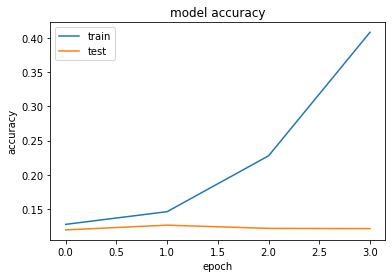

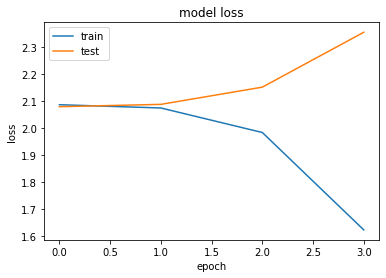

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 19s

 20/266 [=>............................] - ETA: 0s 

 40/266 [===>..........................] - ETA: 0s

 60/266 [=====>........................] - ETA: 0s

 81/266 [========>.....................] - ETA: 0s

102/266 [==========>...................] - ETA: 0s

123/266 [============>.................] - ETA: 0s

144/266 [===============>..............] - ETA: 0s

164/266 [=================>............] - ETA: 0s

185/266 [===================>..........] - ETA: 0s

206/266 [======================>.......] - ETA: 0s

227/266 [========================>.....] - ETA: 0s

248/266 [==========================>...] - ETA: 0s

266/266 [==============================] - 1s 2ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('85fa07fa-71b9-4c8a-a904-3b4fd59898f5'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1034,
 'precentage_won': 12.151839229051593,
 'expected_won': 12.5,
 'eraned': '£517,000.00',
 'revenue': '-£333,900.00'}